# RQ3: **How do different configurations of the optimizers influence their final convergence behavior, including the likelihood of getting trapped in local optima, convergence speed, settling time and the determination of optimal gain values?**

In [1]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from src.analysis.optimizers_results_schemas import (
    BayesianOptimizerResults,
    DifferentialEvolutionResults,
)
from src.analysis.analysis_utils import (
    generate_dict,
    populate_optimizer_results,
)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
%matplotlib inline

In [3]:
DE_RESULTS_DIR = (
    "../DE-results"
)
BO_RESULTS_DIR = (
    "../BO-results"
)

assert os.path.exists(DE_RESULTS_DIR)
assert os.path.exists(BO_RESULTS_DIR)

In [4]:
CONFIGS = [f"config_{i}" for i in range(1, 4)]
TRIALS = [f"trial_{i}" for i in range(1, 2)]
INIT_FILES = ["csv", "txt"]

de_dict = generate_dict(CONFIGS, TRIALS, INIT_FILES)
bo_dict = generate_dict(CONFIGS, TRIALS, INIT_FILES)

In [5]:
de_dict = populate_optimizer_results(
    optimizer_results=DE_RESULTS_DIR, empty_dict=de_dict
)
bo_dict = populate_optimizer_results(
    optimizer_results=BO_RESULTS_DIR, empty_dict=bo_dict
)

In [6]:
de_results = DifferentialEvolutionResults(**de_dict)
bo_results = BayesianOptimizerResults(**bo_dict)

## Configuration 1: Balanced Exploration-Exploitation

In [7]:
header = [
    "Initial State",
    "Optimizer",
    "Time (s)",
    "# Iterations",
    "Settling Time (ms)",
    "Steady State Error %",
    "Kp",
    "Ki",
    "Kd",
]

rows = []

for init_index in range(6):
    # Loop for Bayesian Optimizer
    for config in [bo_results.config_1]:
        trial = config.trial_1
        init_txt = getattr(trial, f"init_{init_index}_txt")
        init_csv = getattr(trial, f"init_{init_index}_csv")
        if init_txt is not None:
            set_point = init_csv["set_point"].values[0]
            rows.append(
                [
                    init_txt.selected_init_state,
                    "Bayesian Optimizer",
                    init_txt.total_exp_time,
                    init_txt.n_trials,
                    init_txt.settling_time,
                    eval(init_csv["angle_values"].values[-1])[-1] - set_point,
                    init_txt.x.Kp,
                    init_txt.x.Ki,
                    init_txt.x.Kd,
                ]
            )
        else:
            rows.append(
                [
                    init_index,
                    "Bayesian Optimizer",
                    "didn't converge",
                    "150",
                    "didn't converge",
                    "didn't converge",
                    "didn't converge",
                    "didn't converge",
                    "didn't converge",
                ]
            )

    for config in [de_results.config_3]:
        trial = config.trial_1
        init_txt = getattr(trial, f"init_{init_index}_txt")
        init_csv = getattr(trial, f"init_{init_index}_csv")
        if init_txt is not None:
            set_point = init_csv["set_point"].values[0]
            rows.append(
                [
                    init_txt.selected_init_state,
                    "Differential Evolution",
                    init_txt.total_exp_time,
                    init_txt.n_trials,
                    init_txt.settling_time,
                    eval(init_csv["angle_values"].values[-1])[-1] - set_point,
                    init_txt.x.Kp,
                    init_txt.x.Ki,
                    init_txt.x.Kd,
                ]
            )
        else:
            rows.append(
                [
                    init_index,
                    "Bayesian Optimizer",
                    "didn't converge",
                    "150",
                    "didn't converge",
                    "didn't converge",
                    "didn't converge",
                    "didn't converge",
                    "didn't converge",
                ]
            )
df = pd.DataFrame(rows, columns=header)
df.style.set_table_styles(
    [
        dict(selector="th", props=[("font-size", "10pt")]),
        dict(selector="td", props=[("font-size", "10pt")]),
    ]
)

,Initial State,Optimizer,Time (s),# Iterations,Settling Time (ms),Steady State Error %,Kp,Ki,Kd
0,0,Bayesian Optimizer,44.602983,3,2400,2.440000,10.907680,0.330117,0.127006
1,0,Differential Evolution,350.970100,31,2400,1.550000,16.000000,0.000000,0.964265
2,1,Bayesian Optimizer,73.686447,5,1300,0.190000,18.249986,0.740096,0.708124
3,1,Differential Evolution,1452.322558,126,1800,3.310000,23.703049,0.261754,0.971221
4,2,Bayesian Optimizer,115.916155,8,1600,-0.530000,6.788276,0.049277,0.409347
5,2,Differential Evolution,364.306251,36,1400,2.090000,6.432000,0.078199,0.782228
6,3,Bayesian Optimizer,7396.854886,121,1100,-0.170000,17.801146,0.670552,0.476415
7,3,Differential Evolution,581.676998,46,1800,1.400000,18.723926,0.162630,0.471297
8,4,Bayesian Optimizer,4358.023055,115,1300,-0.160000,4.930022,0.085849,0.263449
9,4,Differential Evolution,146.397303,11,2500,17.350000,20.154038,0.070000,0.892000


In [8]:
df_balanced = pd.DataFrame(rows, columns=header)
de_settling_time_balanced = df_balanced[
    df_balanced["Optimizer"] == "Differential Evolution"
]["Settling Time (ms)"].values
de_settling_time_balanced = de_settling_time_balanced[
    de_settling_time_balanced != "didn't converge"
]

bo_settling_time_balanced = df_balanced[
    df_balanced["Optimizer"] == "Bayesian Optimizer"
]["Settling Time (ms)"].values
bo_settling_time_balanced = bo_settling_time_balanced[
    bo_settling_time_balanced != "didn't converge"
]

de_sse_balanced = df_balanced[
    df_balanced["Optimizer"] == "Differential Evolution"
]["Steady State Error %"].values
de_sse_balanced = de_sse_balanced[de_sse_balanced != "didn't converge"]
bo_sse_balanced = df_balanced[
    df_balanced["Optimizer"] == "Bayesian Optimizer"
]["Steady State Error %"].values
bo_sse_balanced = bo_sse_balanced[bo_sse_balanced != "didn't converge"]

## Configuration 2: Exploration-Focused

In [9]:
header = [
    "Initial State",
    "Optimizer",
    "Time (s)",
    "# Iterations",
    "Settling Time (ms)",
    "Steady State Error",
    "Kp",
    "Ki",
    "Kd",
]

rows = []

for init_index in range(6):
    # Loop for Bayesian Optimizer
    for config in [bo_results.config_2]:
        trial = config.trial_1
        init_txt = getattr(trial, f"init_{init_index}_txt")
        init_csv = getattr(trial, f"init_{init_index}_csv")
        if init_txt is not None:
            set_point = init_csv["set_point"].values[0]
            rows.append(
                [
                    init_txt.selected_init_state,
                    "Bayesian Optimizer",
                    init_txt.total_exp_time,
                    init_txt.n_trials,
                    init_txt.settling_time,
                    eval(init_csv["angle_values"].values[-1])[-1] - set_point,
                    init_txt.x.Kp,
                    init_txt.x.Ki,
                    init_txt.x.Kd,
                ]
            )
        else:
            rows.append(
                [
                    init_index,
                    "Bayesian Optimizer",
                    "didn't converge",
                    "150",
                    "didn't converge",
                    "didn't converge",
                    "didn't converge",
                    "didn't converge",
                    "didn't converge",
                ]
            )

    for config in [de_results.config_1]:
        trial = config.trial_1
        init_txt = getattr(trial, f"init_{init_index}_txt")
        init_csv = getattr(trial, f"init_{init_index}_csv")
        if init_txt is not None:
            set_point = init_csv["set_point"].values[0]
            rows.append(
                [
                    init_txt.selected_init_state,
                    "Differential Evolution",
                    init_txt.total_exp_time,
                    init_txt.n_trials,
                    init_txt.settling_time,
                    eval(init_csv["angle_values"].values[-1])[-1] - set_point,
                    init_txt.x.Kp,
                    init_txt.x.Ki,
                    init_txt.x.Kd,
                ]
            )

df = pd.DataFrame(rows, columns=header)
df.style.set_table_styles(
    [
        dict(selector="th", props=[("font-size", "10pt")]),
        dict(selector="td", props=[("font-size", "10pt")]),
    ]
)


,Initial State,Optimizer,Time (s),# Iterations,Settling Time (ms),Steady State Error,Kp,Ki,Kd
0,0,Bayesian Optimizer,528.015390,28,1800,2.760000,7.716153,0.051234,0.558820
1,0,Differential Evolution,146.513540,16,1800,-3.360000,12.500000,0.001000,0.635000
2,1,Bayesian Optimizer,didn't converge,150,didn't converge,didn't converge,didn't converge,didn't converge,didn't converge
3,1,Differential Evolution,146.409387,11,2200,8.530000,12.000000,0.000000,0.780000
4,2,Bayesian Optimizer,72.318969,5,1300,0.480000,1.628304,0.596086,0.675110
5,2,Differential Evolution,145.983153,11,1400,12.350000,8.000000,0.000000,0.590000
6,3,Bayesian Optimizer,337.361639,22,1700,-3.420000,5.192586,0.000171,0.034392
7,3,Differential Evolution,219.705821,21,1500,2.240000,9.556112,0.042521,0.459750
8,4,Bayesian Optimizer,330.664691,22,1700,-2.410000,6.639665,0.019850,0.658243
9,4,Differential Evolution,420.446788,31,2400,1.080000,15.687500,0.082160,0.712342


In [10]:
df_exploration = pd.DataFrame(rows, columns=header)
de_settling_time_exploration = df_exploration[
    df_exploration["Optimizer"] == "Differential Evolution"
]["Settling Time (ms)"].values
de_settling_time_exploration = de_settling_time_exploration[
    de_settling_time_exploration != "didn't converge"
]

bo_settling_time_exploration = df_exploration[
    df_exploration["Optimizer"] == "Bayesian Optimizer"
]["Settling Time (ms)"].values
bo_settling_time_exploration = bo_settling_time_exploration[
    bo_settling_time_exploration != "didn't converge"
]

de_sse_exploration = df_exploration[
    df_exploration["Optimizer"] == "Differential Evolution"
]["Steady State Error"].values
de_sse_exploration = de_sse_exploration[de_sse_exploration != "didn't converge"]
bo_sse_exploration = df_exploration[
    df_exploration["Optimizer"] == "Bayesian Optimizer"
]["Steady State Error"].values
bo_sse_exploration = bo_sse_exploration[bo_sse_exploration != "didn't converge"]

## Configuration 3: Exploitation-Focused

In [11]:
header = [
    "Initial State",
    "Optimizer",
    "Time (s)",
    "# Iterations",
    "Settling Time (ms)",
    "Steady State Error",
    "Kp",
    "Ki",
    "Kd",
]

rows = []

for init_index in range(6):
    for config in [bo_results.config_3]:
        trial = config.trial_1
        init_txt = getattr(trial, f"init_{init_index}_txt")
        init_csv = getattr(trial, f"init_{init_index}_csv")
        if init_txt is not None:
            set_point = init_csv["set_point"].values[0]
            rows.append(
                [
                    init_txt.selected_init_state,
                    "Bayesian Optimizer",
                    init_txt.total_exp_time,
                    init_txt.n_trials,
                    init_txt.settling_time,
                    eval(init_csv["angle_values"].values[-1])[-1] - set_point,
                    init_txt.x.Kp,
                    init_txt.x.Ki,
                    init_txt.x.Kd,
                ]
            )
        else:
            rows.append(
                [
                    init_index,
                    "Bayesian Optimizer",
                    "didn't converge",
                    "150",
                    "didn't converge",
                    "didn't converge",
                    "didn't converge",
                    "didn't converge",
                    "didn't converge",
                ]
            )

    for config in [de_results.config_2]:
        trial = config.trial_1
        init_txt = getattr(trial, f"init_{init_index}_txt")
        init_csv = getattr(trial, f"init_{init_index}_csv")
        if init_txt is not None:
            set_point = init_csv["set_point"].values[0]
            rows.append(
                [
                    init_txt.selected_init_state,
                    "Differential Evolution",
                    init_txt.total_exp_time,
                    init_txt.n_trials,
                    init_txt.settling_time,
                    eval(init_csv["angle_values"].values[-1])[-1] - set_point,
                    init_txt.x.Kp,
                    init_txt.x.Ki,
                    init_txt.x.Kd,
                ]
            )

df = pd.DataFrame(rows, columns=header)
df.style.set_table_styles(
    [
        dict(selector="th", props=[("font-size", "10pt")]),
        dict(selector="td", props=[("font-size", "10pt")]),
    ]
)


,Initial State,Optimizer,Time (s),# Iterations,Settling Time (ms),Steady State Error,Kp,Ki,Kd
0,0,Bayesian Optimizer,didn't converge,150,didn't converge,didn't converge,didn't converge,didn't converge,didn't converge
1,0,Differential Evolution,147.730372,16,1700,-1.720000,8.193706,0.001000,0.001000
2,1,Bayesian Optimizer,185.447621,13,1600,2.280000,6.511244,0.085351,0.436861
3,1,Differential Evolution,1236.040173,91,1900,2.330000,12.497146,0.165878,0.952479
4,2,Bayesian Optimizer,3287.166613,70,2300,-2.100000,22.981145,0.924054,0.306222
5,2,Differential Evolution,144.887077,16,2500,15.520000,20.000000,0.001000,1.000000
6,3,Bayesian Optimizer,386.767285,24,1400,3.720000,4.658873,0.048825,0.477699
7,3,Differential Evolution,975.662931,71,2400,2.260000,18.292283,0.262592,0.894938
8,4,Bayesian Optimizer,242.721436,17,2100,3.610000,12.243310,0.173875,0.763353
9,4,Differential Evolution,218.418934,16,1600,4.460000,4.208397,0.001000,1.000000


In [12]:
df_exploitation = pd.DataFrame(rows, columns=header)
de_settling_time_exploitation = df_exploitation[
    df_exploitation["Optimizer"] == "Differential Evolution"
]["Settling Time (ms)"].values
de_settling_time_exploitation = de_settling_time_exploitation[
    de_settling_time_exploitation != "didn't converge"
]

bo_settling_time_exploitation = df_exploitation[
    df_exploitation["Optimizer"] == "Bayesian Optimizer"
]["Settling Time (ms)"].values
bo_settling_time_exploitation = bo_settling_time_exploitation[
    bo_settling_time_exploitation != "didn't converge"
]

de_sse_exploitation = df_exploitation[
    df_exploitation["Optimizer"] == "Differential Evolution"
]["Steady State Error"].values
de_sse_exploitation = de_sse_exploitation[
    de_sse_exploitation != "didn't converge"
]

bo_sse_exploitation = df_exploitation[
    df_exploitation["Optimizer"] == "Bayesian Optimizer"
]["Steady State Error"].values
bo_sse_exploitation = bo_sse_exploitation[
    bo_sse_exploitation != "didn't converge"
]

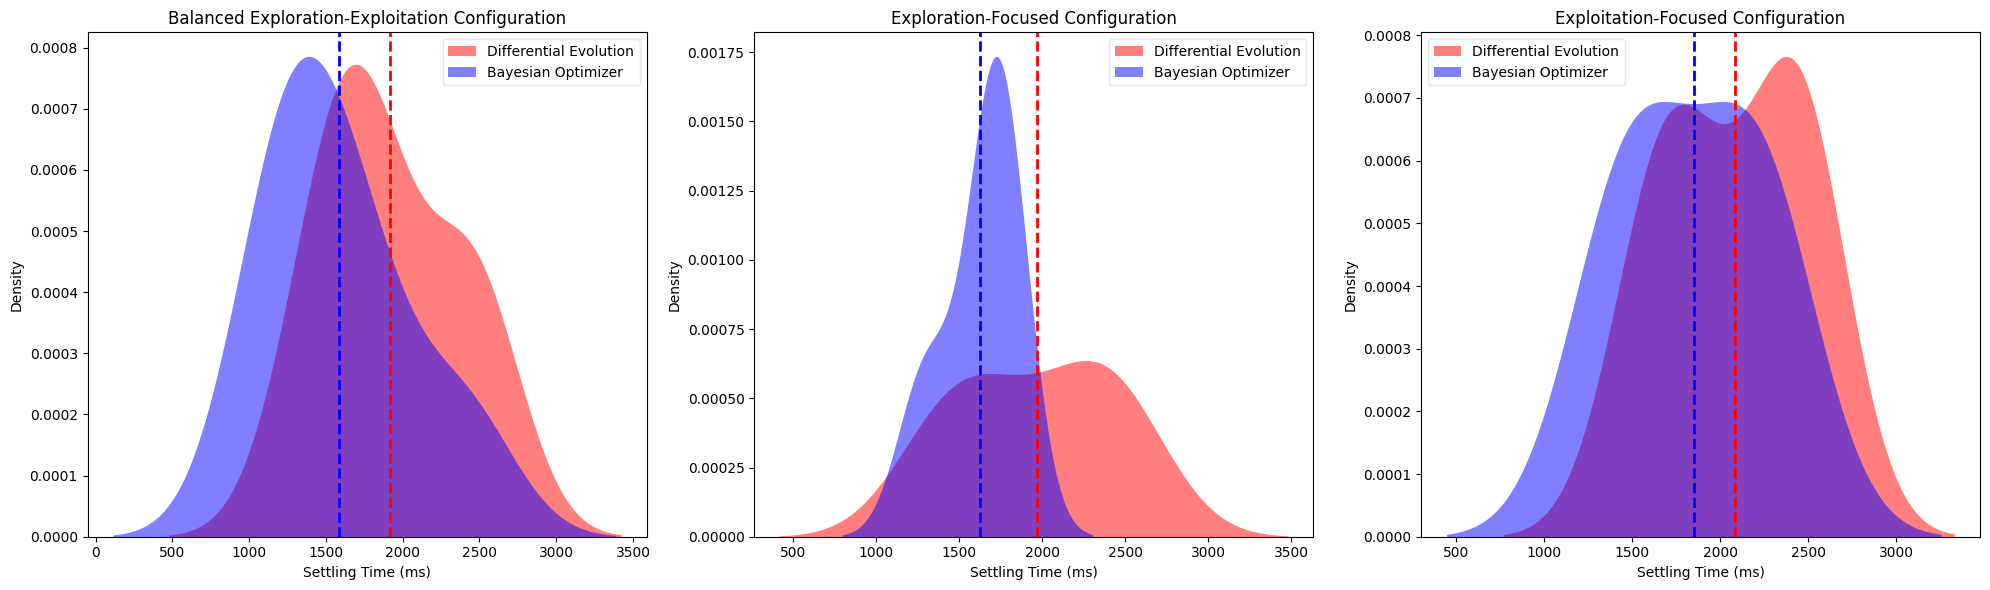

In [13]:
plt.figure(figsize=(20, 6))
plt.subplot(131)

sns.kdeplot(
    de_settling_time_balanced,
    color="red",
    label="Differential Evolution",
    fill=True,
    common_norm=False,
    alpha=0.5,
    linewidth=0,
)
sns.kdeplot(
    bo_settling_time_balanced,
    color="blue",
    label="Bayesian Optimizer",
    fill=True,
    common_norm=False,
    alpha=0.5,
    linewidth=0,
)

plt.title("Balanced Exploration-Exploitation Configuration")
plt.ylabel("Density")
plt.xlabel("Settling Time (ms)")
plt.axvline(
    np.mean(de_settling_time_balanced),
    color="red",
    linestyle="dashed",
    linewidth=2,
)
plt.axvline(
    np.mean(bo_settling_time_balanced),
    color="blue",
    linestyle="dashed",
    linewidth=2,
)
plt.legend(fancybox=True, framealpha=0.5)

plt.subplot(132)

sns.kdeplot(
    de_settling_time_exploration,
    color="red",
    label="Differential Evolution",
    fill=True,
    common_norm=False,
    alpha=0.5,
    linewidth=0,
)
sns.kdeplot(
    bo_settling_time_exploration,
    color="blue",
    label="Bayesian Optimizer",
    fill=True,
    common_norm=False,
    alpha=0.5,
    linewidth=0,
)

plt.title("Exploration-Focused Configuration")
plt.ylabel("Density")
plt.xlabel("Settling Time (ms)")
plt.axvline(
    np.mean(de_settling_time_exploration),
    color="red",
    linestyle="dashed",
    linewidth=2,
)
plt.axvline(
    np.mean(bo_settling_time_exploration),
    color="blue",
    linestyle="dashed",
    linewidth=2,
)
plt.legend(fancybox=True, framealpha=0.5)


plt.subplot(133)

sns.kdeplot(
    de_settling_time_exploitation,
    color="red",
    label="Differential Evolution",
    fill=True,
    common_norm=False,
    alpha=0.5,
    linewidth=0,
)
sns.kdeplot(
    bo_settling_time_exploitation,
    color="blue",
    label="Bayesian Optimizer",
    fill=True,
    common_norm=False,
    alpha=0.5,
    linewidth=0,
)

plt.title("Exploitation-Focused Configuration")
plt.ylabel("Density")
plt.xlabel("Settling Time (ms)")
plt.axvline(
    np.mean(de_settling_time_exploitation),
    color="red",
    linestyle="dashed",
    linewidth=2,
)
plt.axvline(
    np.mean(bo_settling_time_exploitation),
    color="blue",
    linestyle="dashed",
    linewidth=2,
)

plt.legend(fancybox=True, framealpha=0.5)
plt.tight_layout()

plt.show()

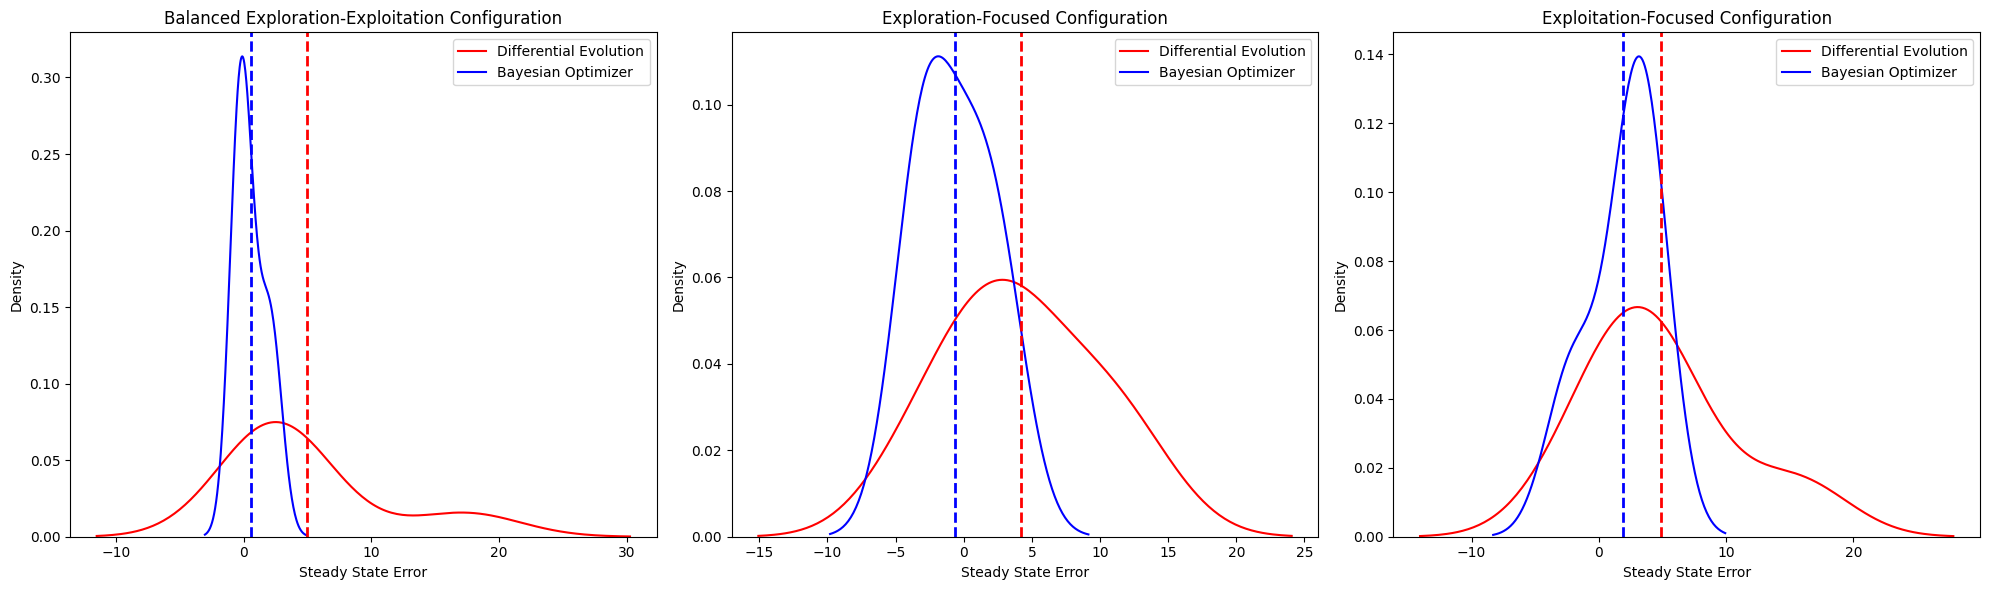

In [14]:
plt.figure(figsize=(20, 6))
plt.subplot(131)


sns.kdeplot(de_sse_balanced, label="Differential Evolution", color="red")
sns.kdeplot(bo_sse_balanced, label="Bayesian Optimizer", color="blue")
plt.xlabel("Steady State Error")
plt.ylabel("Density")
plt.axvline(
    np.mean(de_sse_balanced), color="red", linestyle="dashed", linewidth=2
)
plt.axvline(
    np.mean(bo_sse_balanced), color="blue", linestyle="dashed", linewidth=2
)
plt.title("Balanced Exploration-Exploitation Configuration")
plt.legend()

plt.subplot(132)

sns.kdeplot(de_sse_exploration, label="Differential Evolution", color="red")
sns.kdeplot(bo_sse_exploration, label="Bayesian Optimizer", color="blue")
plt.xlabel("Steady State Error")
plt.ylabel("Density")
plt.axvline(
    np.mean(de_sse_exploration), color="red", linestyle="dashed", linewidth=2
)
plt.axvline(
    np.mean(bo_sse_exploration), color="blue", linestyle="dashed", linewidth=2
)
plt.title("Exploration-Focused Configuration")
plt.legend()

plt.subplot(133)

sns.kdeplot(de_sse_exploitation, label="Differential Evolution", color="red")
sns.kdeplot(bo_sse_exploitation, label="Bayesian Optimizer", color="blue")
plt.xlabel("Steady State Error")
plt.ylabel("Density")
plt.axvline(
    np.mean(de_sse_exploitation), color="red", linestyle="dashed", linewidth=2
)
plt.axvline(
    np.mean(bo_sse_exploitation), color="blue", linestyle="dashed", linewidth=2
)
plt.title("Exploitation-Focused Configuration")
plt.legend()
plt.tight_layout()

plt.show()